### Import Libraries and Read Images

In [350]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [351]:
# Define path to images and labels
imgs_path = "../dataset/images/"
labels_path = "../dataset/labels/"

# Save all names of images in list
rust_imgs = os.listdir(imgs_path)
rust_imgs[:6]

['004461.JPG',
 '004255.JPG',
 '004437.JPG',
 '004435.JPG',
 '004379.JPG',
 '004317.JPG']

In [352]:
# Select an index from list of image names
img_idx = np.random.randint(100)

# Main image path
img_path = imgs_path + rust_imgs[img_idx]

# OpenCV by default reads images in BGR format
rust = cv2.imread(img_path)

# Convert the main image to RGB color space
rust_rgb = cv2.cvtColor(rust, cv2.COLOR_BGR2RGB)

# Load and Read Ground Truth image
label_path = labels_path + rust_imgs[img_idx]
rust_gt = cv2.imread(label_path.replace('JPG', 'png'))
rust_gt = cv2.cvtColor(rust_gt, cv2.COLOR_BGR2RGB)

# Shape of main image
print(f"Imported Image Shape: {rust.shape}")

Imported Image Shape: (256, 256, 3)


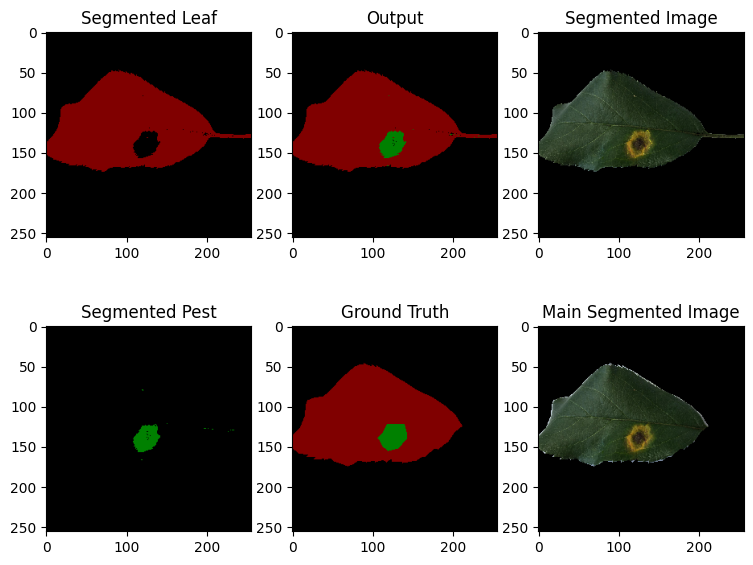

In [353]:
# Convert to HSV space to segmentation
rust_hsv = cv2.cvtColor(rust, cv2.COLOR_RGB2HSV)

# Apply a threshold to the green channel to extract the leaves mask
lower_leaf = np.array([30, 25, 25])
upper_leaf = np.array([90, 255, 255])

# Apply a threshold to the red channel to extract the rust pests mask
lower_pest = np.array([90, 60, 30])
upper_pest = np.array([130, 255, 255])

rust_mask = cv2.inRange(rust_hsv, lower_leaf, upper_leaf)
pest_mask = cv2.inRange(rust_hsv, lower_pest, upper_pest)

# Create a black background image with the same size as the main image
background = np.zeros(rust_rgb.shape, dtype=np.uint8)

# Apply color image segmentation to the main image using the rust mask
rust_color = (128, 0, 0) # Red color
rust_masked_img = cv2.bitwise_and(background, background, mask=rust_mask)
rust_masked_img[rust_mask != 0] = rust_color

# Apply color image segmentation to the main image using the pests mask
pest_color = (0, 128, 0) # Green color
pest_masked_img = cv2.bitwise_and(background, background, mask=pest_mask)
pest_masked_img[pest_mask != 0] = pest_color

# Combine the segmented images
color_segmented = cv2.add(rust_masked_img, pest_masked_img)
green_and_red_idx = np.logical_and(np.array(pest_mask != 0),
                             np.array(rust_mask != 0))
color_segmented[green_and_red_idx] = rust_color

# Save the combined segmented image
# cv2.imwrite(label_path, combined_segmented_img)

rust_segmented = cv2.bitwise_and(rust_rgb, rust_rgb, mask=rust_mask)
pest_segmented = cv2.bitwise_and(rust_rgb, rust_rgb, mask=pest_mask)
img_segmented = cv2.add(rust_segmented, pest_segmented)

main_img_segmented = cv2.bitwise_and(rust_rgb, rust_rgb,
                                     mask=cv2.cvtColor(rust_gt, cv2.COLOR_RGB2GRAY))


plt.figure(figsize=(9, 7))
plt.subplot(2, 3, 1)
plt.title("Segmented Leaf")
plt.imshow(rust_masked_img)

plt.subplot(2, 3, 2)
plt.title("Output")
plt.imshow(color_segmented)

plt.subplot(2, 3, 3)
plt.title("Segmented Image")
plt.imshow(img_segmented)

plt.subplot(2, 3, 4)
plt.title("Segmented Pest")
plt.imshow(pest_masked_img)

plt.subplot(2, 3, 5)
plt.title("Ground Truth")
plt.imshow(rust_gt)

plt.subplot(2, 3, 6)
plt.title("Main Segmented Image")
plt.imshow(main_img_segmented)

In [354]:
# Calculate accuracy with having segmented image and ground truth
def accuracy(seg, gt):
    assert seg.shape == gt.shape
    correct_pixels = 0
    total_pixels = seg.shape[0] * seg.shape[1]
    for i in range(seg.shape[0]):
        for j in range(seg.shape[1]):
            if np.all(seg[i, j] == gt[i, j]):
                correct_pixels += 1
    accuracy = correct_pixels / total_pixels
    return accuracy    

In [355]:
acc = accuracy(color_segmented, rust_gt)
print(f"Pixel-wise accuracy: {acc * 100:.3f} %")

Pixel-wise accuracy: 98.740 %
